<a href="https://colab.research.google.com/github/nataly-tor/-Python/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Загрузите файл HR.csv в pandas dataframe 

In [ ]:
df = pd.read_csv('HR.csv')

In [ ]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [ ]:
# Для удобства создадим списки качественных и количественных переменных
categorial = ['Work_accident','left','promotion_last_5years','department','salary']
numerical = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']

In [ ]:
# Базовые статистики для количественных переменных
round(df[numerical].describe(),2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50
std,0.25,0.17,1.23,49.94,1.46
min,0.09,0.36,2.00,96.00,2.00
25%,0.44,0.56,3.00,156.00,3.00
50%,0.64,0.72,4.00,200.00,3.00
75%,0.82,0.87,5.00,245.00,4.00
max,1.00,1.00,7.00,310.00,10.00


In [ ]:
# Мода для категориальных переменных
df[categorial].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


In [ ]:
# Распределение значений для категориальных переменных
for col in categorial:
  print('Распределение значений:')
  print( round( df[col].value_counts(normalize=True) * 100,2 ) )
  print('')

Распределение значений:
0    85.54
1    14.46
Name: Work_accident, dtype: float64

Распределение значений:
0    76.19
1    23.81
Name: left, dtype: float64

Распределение значений:
0    97.87
1     2.13
Name: promotion_last_5years, dtype: float64

Распределение значений:
sales          27.60
technical      18.13
support        14.86
IT              8.18
product_mng     6.01
marketing       5.72
RandD           5.25
accounting      5.11
hr              4.93
management      4.20
Name: department, dtype: float64

Распределение значений:
low       48.78
medium    42.98
high       8.25
Name: salary, dtype: float64



3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

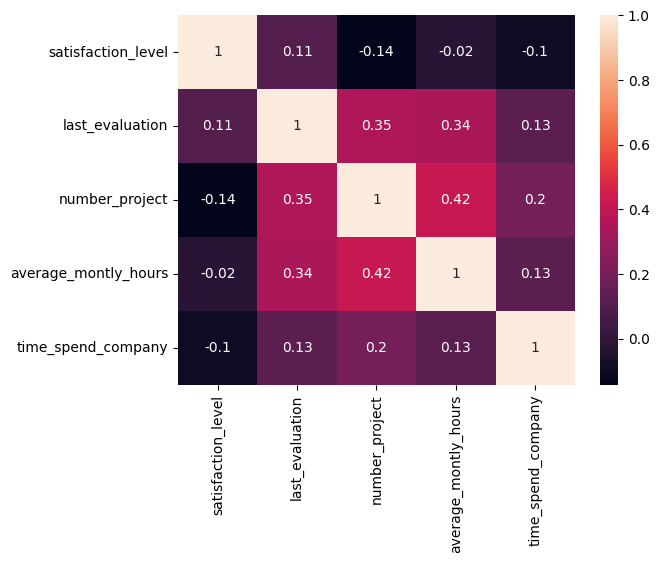

In [ ]:
# Корреляционная матрица
sns.heatmap(df[numerical].corr(), annot=True);

In [ ]:
corr = df[numerical].corr().abs().unstack().reset_index(name='corr').rename(columns={'level_0':'f1','level_1':'f2'})

In [ ]:
# Наименее скоррелированные переменные - Уровень удовлетворенности работой и Среднее количество часов на рабочем месте в месяц
corr.sort_values(by='corr').head(1)

,f1,f2,corr
3,satisfaction_level,average_montly_hours,0.020048


In [ ]:
# Наиболее скоррелированные переменные - Среднее количество часов на рабочем месте в месяц и Количество проектов, выполненных за время работы
corr[corr['corr']!=1].sort_values(by='corr').tail(1)

,f1,f2,corr
17,average_montly_hours,number_project,0.417211


4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [ ]:
# Тех, кто уволился, не считаем
# Большая часть сотрудников работает в продажах
df[df['left']==0]['department'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

5. Показать распределение сотрудников по зарплатам

In [ ]:
# Большая часть сотрудников имеет низкую и среднюю заработную плату
round( df['salary'].value_counts(normalize = True), 2)*100

low       49.0
medium    43.0
high       8.0
Name: salary, dtype: float64

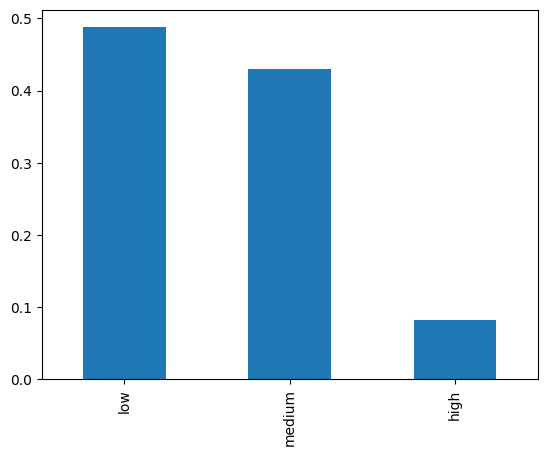

In [ ]:
df['salary'].value_counts(normalize = True).plot(kind='bar');

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

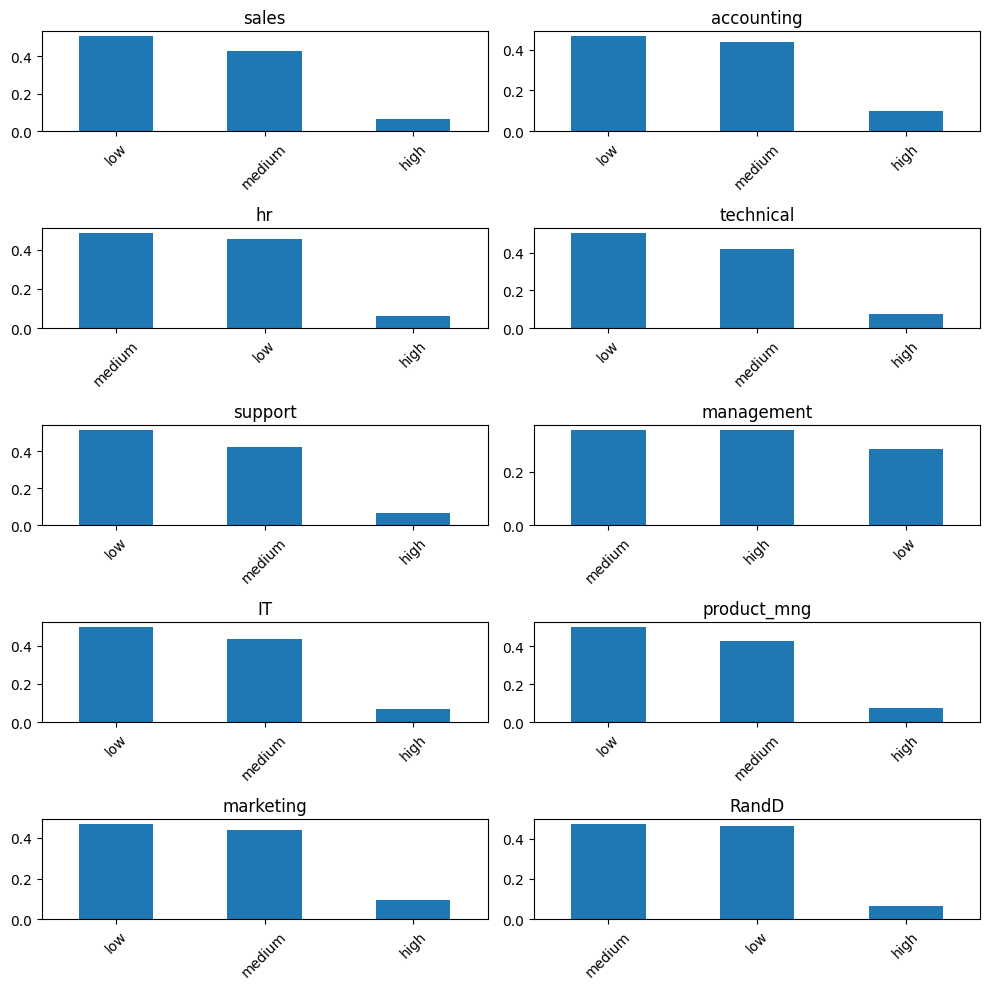

In [ ]:
# В целом по всем депарматентам превалирует низкая и средняя зарплата. 
# Исключение - менеджмент, для которого большая часть сотрудников имеет среднюю и высокую зарплату
plt.figure(figsize=(10, 10))
departments = list(df['department'].unique())

for n, dep in enumerate(departments):
  plt.subplot(5, 2, n+1)
  ax = df[df['department'] == dep]['salary'].value_counts(normalize = True).plot(kind='bar')
  ax.set_title(dep)
  plt.xticks(rotation=45)
  plt.tight_layout()

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
low_salary = df[df['salary']=='low']['average_montly_hours']
high_salary = df[df['salary']=='high']['average_montly_hours']

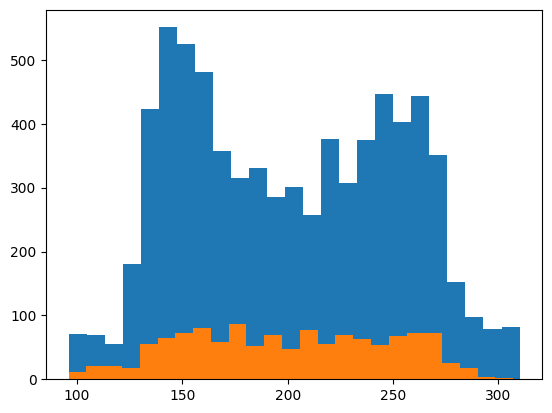

In [ ]:
plt.hist(low_salary, bins=25); #Выборка A
plt.hist(high_salary, bins=25);  #Выборка B

In [ ]:
import scipy.stats as st

In [ ]:
# Проверяем на равенство вариаций
stat, p = st.levene(low_salary,high_salary)
print(f"p = {p:.5f}")
if p <0.05:
    print("Отклоняем нулевую гипотезу >> Вариация в группах раличается")
else:
    print("Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая")

p = 0.00000
Отклоняем нулевую гипотезу >> Вариация в группах раличается


In [ ]:
# Вариация отличается. Для проверки гипотезы используем тест Стьюдента для двух выборок с поправкой Уэлча
stat, p = st.ttest_ind(low_salary, high_salary, equal_var = False)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 0.76243, p = 0.4459045542
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [ ]:
# В среднем среди уволившихся сотрудников наблюдается меньшая доля повышений, ниже уровень удовлетворенности и большее число проектов
round( df.groupby('left').aggregate({'promotion_last_5years' : 'mean', 
                              'satisfaction_level' : 'mean',
                              'number_project' : 'mean'}) , 2)

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.03,0.67,3.79
1,0.01,0.44,3.86


9. Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [ ]:
# Выборка по целевой переменной не совсем сбалансированна - превалирует класс не уволившихся сотрудников
round( df['left'].value_counts(normalize=True)*100,2 )

0    76.19
1    23.81
Name: left, dtype: float64

In [ ]:
# Создаем отдельные переменные под независимые переменные и таргет
X = df.drop(['department','salary','left'], axis = 1)
y = df[['left']]

In [ ]:
# Разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# Обучаем данные
lda.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Оцениваем качество модели на тестовой выборке
# Качество модели достаточно высокое
accuracy_score(y_test, lda.predict(X_test))

0.7536